# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as r
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

590


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#define units to be in metric for url
units = 'metric'

#define url to be open weather website PLUS api key
url = f'http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units={units}'

print(f'Beginning Data Retrieval')
#loop through cities and request response for each
city_count = 0
set_count = 1

#set up list to store response dictionaries in
city_list = []

for city in cities:
    #add city name to url
    query_url = f'{url}&q={city}'
    #request response and convert to json
    response_json = r.get(query_url).json()
    #set up try and except to make sure incorrect/nonexistent cities are skipped
    try:
        #keep running number of cities
        city_count += 1
        print(f'Processing Record {city_count} of Set {set_count} | {city}')
        city_list.append(response_json)
    except:
        #change set count after an error occurs
        set_count += 1
        print(f'City not found. Skipping...')
        pass

ing Record 118 of Set 1 | dali
Processing Record 119 of Set 1 | yar-sale
Processing Record 120 of Set 1 | isabela
Processing Record 121 of Set 1 | hunza
Processing Record 122 of Set 1 | naze
Processing Record 123 of Set 1 | okhotsk
Processing Record 124 of Set 1 | kahului
Processing Record 125 of Set 1 | georgetown
Processing Record 126 of Set 1 | tautira
Processing Record 127 of Set 1 | pangkalanbuun
Processing Record 128 of Set 1 | okato
Processing Record 129 of Set 1 | geraldton
Processing Record 130 of Set 1 | honningsvag
Processing Record 131 of Set 1 | nanortalik
Processing Record 132 of Set 1 | inuvik
Processing Record 133 of Set 1 | kargasok
Processing Record 134 of Set 1 | verkhnevilyuysk
Processing Record 135 of Set 1 | karaul
Processing Record 136 of Set 1 | port lincoln
Processing Record 137 of Set 1 | sentyabrskiy
Processing Record 138 of Set 1 | kodinsk
Processing Record 139 of Set 1 | yeppoon
Processing Record 140 of Set 1 | chapais
Processing Record 141 of Set 1 | tomat

In [5]:
#empty lists for dataframe
city_names, lat, lon, max_temp, humidity, cloudiness, wind_speed, country, date = [], [], [], [], [], [], [], [], []

#loop through dictionary list appending relevant items to dataframe lists
for i in range(0, (len(cities)-1)):
    try:
        city_names.append(city_list[i]['name']),
        lat.append(city_list[i]['coord']['lat']),
        lon.append(city_list[i]['coord']['lon']),
        max_temp.append(city_list[i]['main']['temp_max']),
        humidity.append(city_list[i]['main']['humidity']),
        cloudiness.append(city_list[i]['clouds']['all']),
        wind_speed.append(city_list[i]['wind']['speed']),
        country.append(city_list[i]['sys']['country']),
        date.append(city_list[i]['dt'])
    except:
        pass

In [6]:
### Convert Raw Data to DataFrame
#make new dataframe
city_data = pd.DataFrame({
    'City': city_names,
    'Latitude': lat, 
    'Longitude': lon,
    'Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

#* Export the city data into a .csv.
city_data.to_csv(output_data_file, index=False)
#* Display the DataFrame
city_data.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,9.67,77,85,7.33,NZ,1594281439
1,Cape Town,-33.93,18.42,17.22,77,40,13.40,ZA,1594281289
2,Caronport,50.45,-105.82,15.56,94,62,4.02,CA,1594281439
3,Carnarvon,-24.87,113.63,21.00,52,25,8.70,AU,1594281312
4,Hobart,-42.88,147.33,7.22,81,20,1.50,AU,1594281155


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#confirm there are no outliers with humidity over 100
outliers = city_data[city_data['Humidity'] > 100]
print(f'There are {len(outliers)} outliers')

There are 0 outliers


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data[city_data['Humidity'] <= 100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

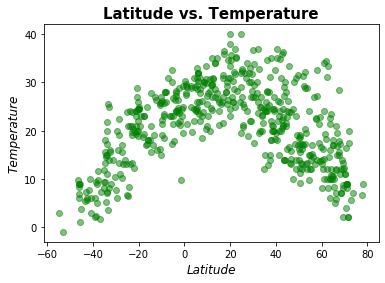

In [18]:
#save y label to use in plot functions
x = 'Latitude'
y = 'Temperature'

#retrieve values from referenced columns
x_values = clean_city_data[f'{x}']
y_values = clean_city_data[f'{y}']

#plot x and y values
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, c='green', alpha=0.5)
ax.set_title(f'{x} vs. {y}', fontsize=15, fontweight='bold')
ax.set_xlabel(f'{x}', fontsize=12, fontstyle='italic')
ax.set_ylabel(f'{y}', fontsize=12, fontstyle='italic')
plt.savefig(f'WeatherPy_figs/{x}_vs_{y}.png')

#Observation: This chart is ploting max temperature for each city against that city's latitude. The graph shows that temperature goes up as latitude gets closer to zero (equator), which is expected.

## Latitude vs. Humidity Plot

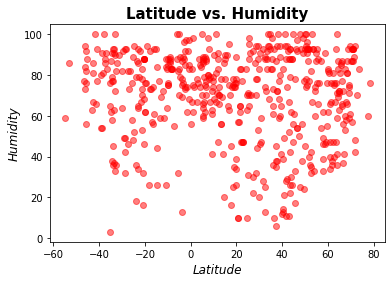

In [19]:
#save y label to use in plot functions
x = 'Latitude'
y = 'Humidity'

#retrieve values from referenced columns
x_values = clean_city_data[f'{x}']
y_values = clean_city_data[f'{y}']

#plot x and y values
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, c='red', alpha=0.5)
ax.set_title(f'{x} vs. {y}', fontsize=15, fontweight='bold')
ax.set_xlabel(f'{x}', fontsize=12, fontstyle='italic')
ax.set_ylabel(f'{y}', fontsize=12, fontstyle='italic')
plt.savefig(f'WeatherPy_figs/{x}_vs_{y}.png')

#Observation: This chart is ploting humidity for each city against that city's latitude.

## Latitude vs. Cloudiness Plot

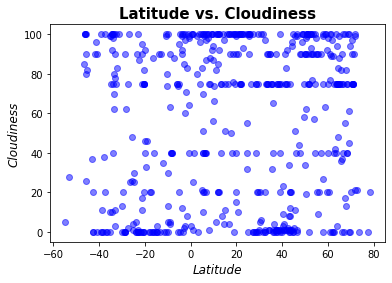

In [22]:
#save y label to use in plot functions
x = 'Latitude'
y = 'Cloudiness'

#retrieve values from referenced columns
x_values = clean_city_data[f'{x}']
y_values = clean_city_data[f'{y}']

#plot x and y values
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, c='blue', alpha=0.5)
ax.set_title(f'{x} vs. {y}', fontsize=15, fontweight='bold')
ax.set_xlabel(f'{x}', fontsize=12, fontstyle='italic')
ax.set_ylabel(f'{y}', fontsize=12, fontstyle='italic')
plt.savefig(f'WeatherPy_figs/{x}_vs_{y}.png')

#Observation: This chart is ploting cloudiness for each city against that city's latitude.

## Latitude vs. Wind Speed Plot

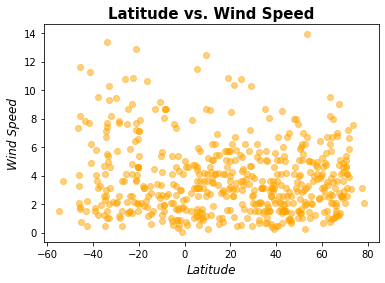

In [23]:
#save y label to use in plot functions
x = 'Latitude'
y = 'Wind Speed'

#retrieve values from referenced columns
x_values = clean_city_data[f'{x}']
y_values = clean_city_data[f'{y}']

#plot x and y values
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, c='orange', alpha=0.5)
ax.set_title(f'{x} vs. {y}', fontsize=15, fontweight='bold')
ax.set_xlabel(f'{x}', fontsize=12, fontstyle='italic')
ax.set_ylabel(f'{y}', fontsize=12, fontstyle='italic')
plt.savefig(f'WeatherPy_figs/{x}_vs_{y}.png')

#Observation: This chart is ploting wind speed for each city against that city's latitude. 

## Linear Regression

In [78]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return (regress_values, line_eq)

In [43]:
def linear_regression_plot(df, x_label, y_label):
    x = df[f'{x_label}']
    y = df[f'{y_label}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    if intercept > 0:
        color1 = 'blue'
        color2 = 'red'
        y_coord = 5
    else:
        color1 = 'red'
        color2 = 'blue'
        y_coord = -5
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=color1, alpha=0.5)
    ax.plot(x, regress_values, c=color2)
    #ax.annotate(line_eq,(1,y_coord), fontsize=15, c=color2)
    ax.set_title(f'{x_label} vs. {y_label}', fontsize=15, fontweight='bold')
    ax.set_xlabel(f'{x_label}', fontsize=12, fontstyle='italic')
    ax.set_ylabel(f'{y_label}', fontsize=12, fontstyle='italic')
    ax.text(0.05, 0.95, line_eq, transform=ax.transAxes, fontsize=14, fontweight='bold', verticalalignment='top', color=color2)
    plt.savefig(f'{x_label}_vs_{y_label}.png')

In [44]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data[clean_city_data['Latitude'] > 0]
southern_df = clean_city_data[clean_city_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

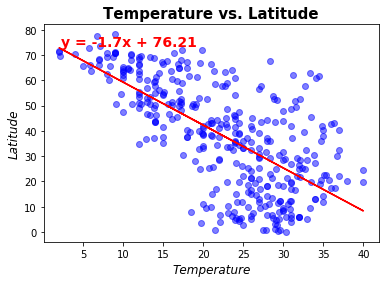

In [45]:
linear_regression_plot(northern_df, 'Temperature', 'Latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

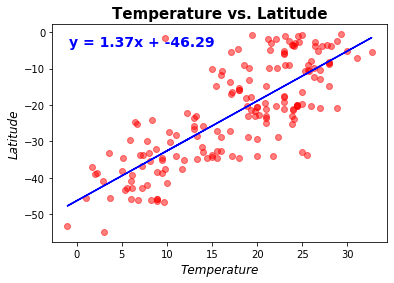

In [46]:
linear_regression_plot(southern_df, 'Temperature', 'Latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

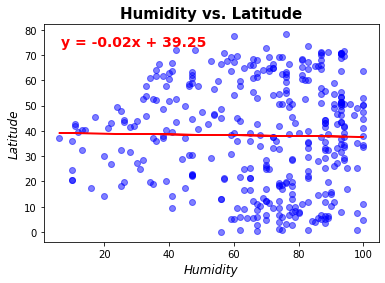

In [47]:
linear_regression_plot(northern_df, 'Humidity', 'Latitude')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

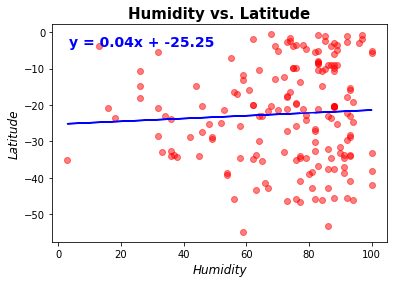

In [48]:
linear_regression_plot(southern_df, 'Humidity', 'Latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

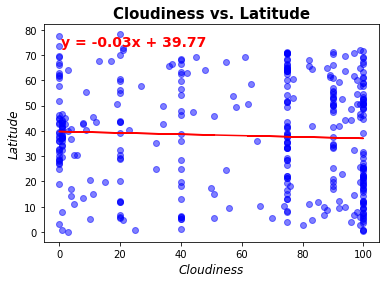

In [49]:
linear_regression_plot(northern_df, 'Cloudiness', 'Latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

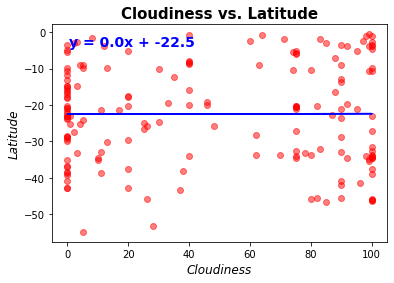

In [50]:
linear_regression_plot(southern_df, 'Cloudiness', 'Latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

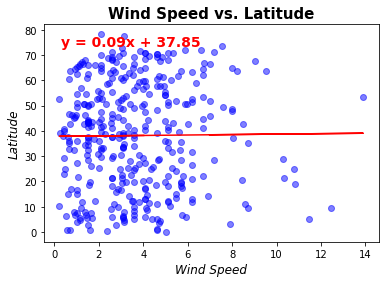

In [51]:
linear_regression_plot(northern_df, 'Wind Speed', 'Latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

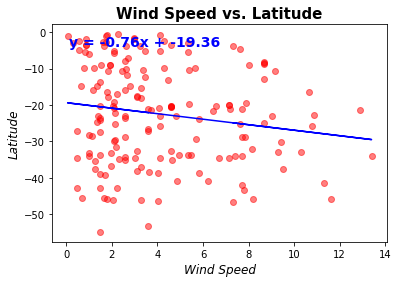

In [52]:
linear_regression_plot(southern_df, 'Wind Speed', 'Latitude')